# Data Science Technical Assessment
## SCAMP Assessment

In [1]:
# Importing the necessary package

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


# Importing the dataset and Exploratory Data Analysis


In [2]:
amazon=pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
amazon.head()# subset of the dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
amazon.shape# checking the shape of the dataset

(550, 7)

In [5]:
amazon.isnull().sum() #checking for missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
amazon.info() # checking for information on the types of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Visualization

In [7]:
import matplotlib.pyplot as plt # importing matplotlib
import seaborn as sns # importing seaborn

# 1. Best Selling Books of the Decade

* The best selling books of the decade are going to be based on The User Ratings and the top reviews.
* The best seller is determined by sorting the columns by the User Ratings

In [8]:
best_seller= amazon[['Name','User Rating','Reviews','Year']]
best_seller_ratings = best_seller.sort_values(by=['User Rating'],ascending =False)
best_seller_ratings.head(10)

,Name,User Rating,Reviews,Year
431,The Magnolia Story,4.9,7861,2016
87,Dog Man: Lord of the Fleas: From the Creator o...,4.9,5470,2018
85,Dog Man: Fetch-22: From the Creator of Captain...,4.9,12619,2019
84,Dog Man: Brawl of the Wild: From the Creator o...,4.9,7235,2019
83,Dog Man: Brawl of the Wild: From the Creator o...,4.9,7235,2018
82,Dog Man: A Tale of Two Kitties: From the Creat...,4.9,4786,2017
81,Dog Man and Cat Kid: From the Creator of Capta...,4.9,5062,2018
252,"Oh, the Places You'll Go!",4.9,21834,2019
476,The Very Hungry Caterpillar,4.9,19546,2013
477,The Very Hungry Caterpillar,4.9,19546,2014


* The best sellers will be determined by sorting out the columns and extracting the data with reviews atleast up to the 75 percentile which is 17253 and User ratings above or equal to 4.8

In [9]:
best_sellers = best_seller.loc[(best_seller['User Rating'] >=4.8) & (best_seller['Reviews'] >= 17253)]
# Sorting and extracting the necessary data

In [10]:
amazon.describe()#Checking the descriptive statistics of the dataset

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
best_sellers

,Name,User Rating,Reviews,Year
32,Becoming,4.8,61133,2018
33,Becoming,4.8,61133,2019
153,Harry Potter and the Chamber of Secrets: The I...,4.9,19622,2016
187,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2011
188,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2012
189,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2013
190,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2014
191,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2015
192,Jesus Calling: Enjoying Peace in His Presence ...,4.9,19576,2016
223,Love You Forever,4.8,18613,2014


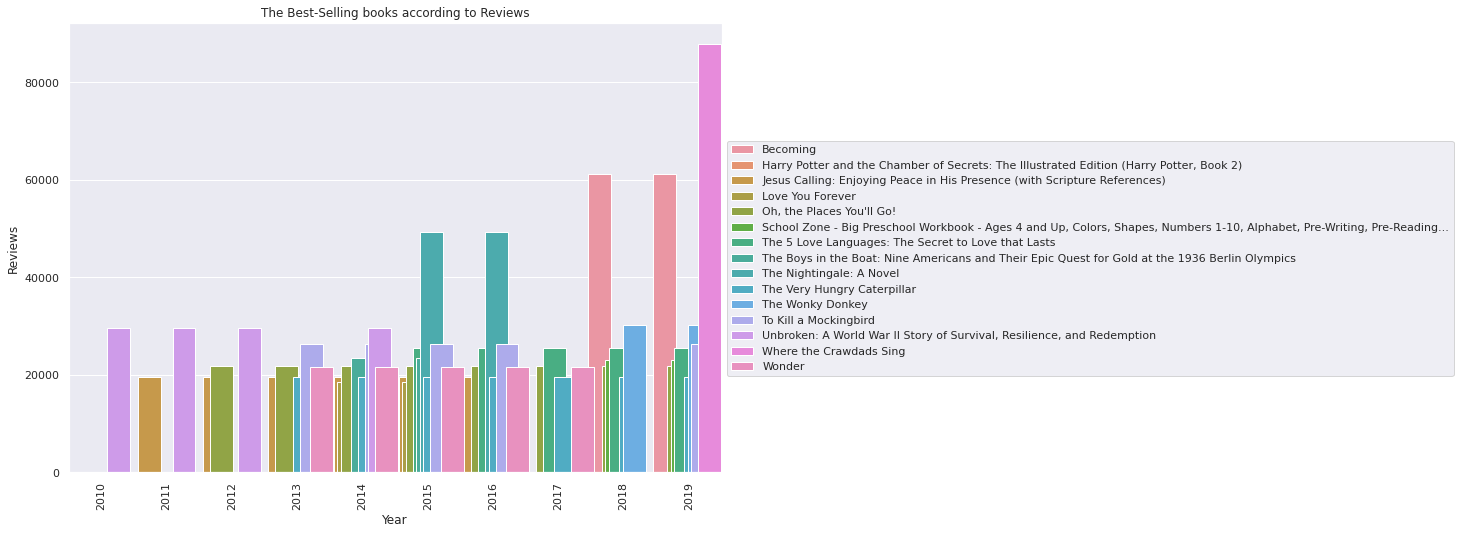

In [12]:

sns.set(rc={'figure.figsize':(11.7,8.27)}) # seting the size of the plot
ax= sns.barplot(x="Year", y="Reviews",hue='Name' ,data=best_sellers)
def change_width(ax, new_value) :# creating a function to help increace the width
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.title('The Best-Selling books according to Reviews')
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1,0.75))

plt.show()

* The above displays the number of Reviews of each book that is above the 75 percentitle and user rating that is above or equal to 4.8,
* The best sellering books of the Decade are as follows:
1. Becoming
2. Harry Potter and the chambers of secrets
3. Jesus Calling e.t.c

# 2. The percentage of Fiction to Non-Fiction

* Calculating the ratio of Fiction will be determined using countplot to distinguish between the two variables

[]

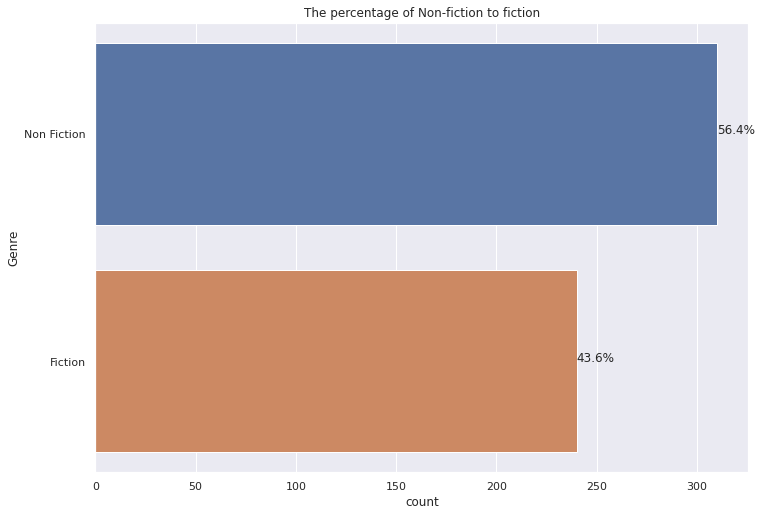

In [13]:
ax = sns.countplot(y='Genre',data=amazon )# using a countplot
total = len(amazon['Genre'])
for p in ax.patches: # Using a for loop to determine the percentage
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('The percentage of Non-fiction to fiction')
plt.plot()

*  From the visuals above, the percentage of Non-fiction is 56.4% to Fiction which is 43.6%. Alot of Non fiction books are read than fiction.

# 3. The trends over the years
* We are going to be determining the trend of books based on their genre. Visualizing the genre column helps us to determine the trend of books lovers. This determines the taste of  our book readers as to which is prefered over the years(Fiction or Non-fiction books). 


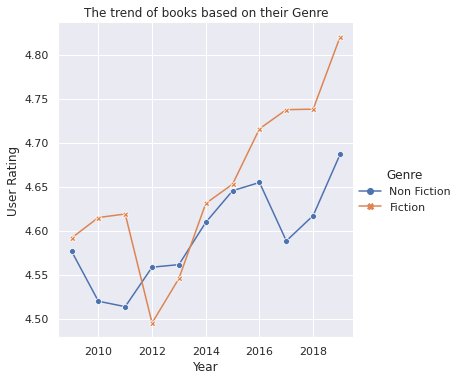

In [14]:

sns.relplot(x='Year', y="User Rating",  kind='line',
                data=amazon,style="Genre", 
            hue="Genre",markers=True,dashes=False,ci=None)# A line graph is used, using relplot().Markers were added tp help to differenciate between the two types of Genre 
plt.title('The trend of books based on their Genre')
plt.show()

* In the recent years,there has been an increase in the love for fiction books than that of non fiction books based on the users ratings.

# 4.The top authors based on reviews.
* In other to determine the top authors,the two required columns will be isolated to create a sub dataframe(This is not compulsory).The Authors will be sorted out based on the reviews and ranked from the highest to the lowest.

In [15]:
authors_reviews= amazon[['Author','Reviews']]
top_authors =authors_reviews.sort_values(by='Reviews', ascending = False)# sorting by reviews
top_authors

,Author,Reviews
534,Delia Owens,87841
382,Paula Hawkins,79446
383,Paula Hawkins,79446
32,Michelle Obama,61133
33,Michelle Obama,61133
...,...,...
359,Jon Stewart,440
512,Edward M. Kennedy,438
121,Peter A. Lillback,408
300,Zhi Gang Sha,220


<Figure size 720x360 with 0 Axes>

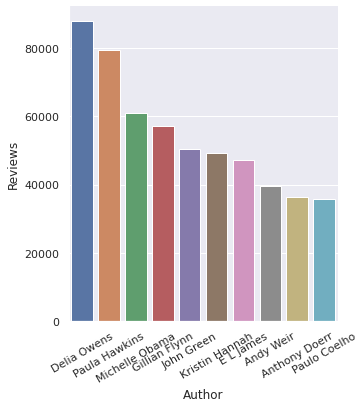

In [16]:

top_10=top_authors.head(20)#data to be accessed
plt.figure(figsize=(10,5))# setting the size
ax = sns.catplot(x='Author',y='Reviews',data=top_10,kind='bar') # barchart
ax.set_xticklabels(rotation=30)
plt.show()


* It would appear as the Top Authors are Delia Owen, Paula Hawkins,Michelle Obama,GillianFlynn,Kristin Hannah,E.L.James,Andy Weir,Anthony Doerr,Paulo Coelho respectively.
